In [1]:
#importing some essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the datasets
data1 = pd.read_csv('IRAhandle_tweets_1.csv')
data2 = pd.read_csv('IRAhandle_tweets_2.csv')
data3 = pd.read_csv('IRAhandle_tweets_3.csv')
data4 = pd.read_csv('IRAhandle_tweets_4.csv')
data5 = pd.read_csv('IRAhandle_tweets_5.csv')
data6 = pd.read_csv('IRAhandle_tweets_6.csv')
data7 = pd.read_csv('IRAhandle_tweets_7.csv')
data8 = pd.read_csv('IRAhandle_tweets_8.csv')
data9 = pd.read_csv('IRAhandle_tweets_9.csv')

# Data Preparation

In [3]:
#concatinating all the dataset to one
troll_data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9],axis=0)

In [4]:
#checking its shape
troll_data.shape

(2973371, 15)

.

In [5]:
#viewing our data
troll_data.head(3)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll


In [6]:
#checking for some null values

troll_data.isnull().sum().sort_values(ascending = False)

post_type             1662425
region                   8843
account_type              363
external_author_id          4
content                     1
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
author                      0
dtype: int64

In [7]:
#lets check number of unique authors are there

len(troll_data.author.unique())


2848

In [8]:
#Since we have use to the content so lets remove the null value of content

troll_data.dropna(subset= ['content'],inplace=True)

#again checking for NAN
troll_data.isnull().sum().sort_values(ascending = False)


post_type             1662424
region                   8843
account_type              363
external_author_id          4
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
content                     0
author                      0
dtype: int64

In [9]:
#look at the types of data included in each field.

troll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973370 entries, 0 to 37554
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 363.0+ MB


In [10]:
#removing some columns with are not usefull for data preparation
troll_data.drop(labels=['external_author_id', 'harvested_date'],axis=1,inplace=True) 

In [11]:
#checking the data
troll_data.drop(labels = ['author'],axis=1,inplace = True)

In [12]:
#review our data
troll_data.head()

,content,region,language,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [13]:
troll_data.language.unique()

array(['English', 'Russian', 'Serbian', 'Ukrainian', 'Tagalog (Filipino)',
       'Albanian', 'Italian', 'Romanian', 'Spanish', 'Catalan', 'German',
       'Estonian', 'French', 'Norwegian', 'Vietnamese', 'Dutch', 'Arabic',
       'Uzbek', 'Bulgarian', 'Macedonian', 'Farsi (Persian)', 'Turkish',
       'LANGUAGE UNDEFINED', 'Czech', 'Somali', 'Lithuanian', 'Croatian',
       'Slovak', 'Icelandic', 'Slovenian', 'Japanese', 'Indonesian',
       'Pushto', 'Hungarian', 'Finnish', 'Latvian', 'Portuguese',
       'Danish', 'Swedish', 'Malay', 'Polish', 'Korean', 'Hebrew', 'Urdu',
       'Kurdish', 'Hindi', 'Greek', 'Simplified Chinese', 'Thai',
       'Bengali', 'Traditional Chinese', 'Gujarati', 'Kannada', 'Tamil',
       'Telugu', 'Malayalam'], dtype=object)

In [14]:
#there are many languages in the data soupdate data to only contain english tweets 
troll_data = troll_data.loc[troll_data.language=='English']

In [15]:
troll_data.drop(['language'],axis=1,inplace = True)

After Removing all the null values

In [16]:
troll_data.region.unique()

array(['Unknown', 'United States', 'Italy', nan, 'United Arab Emirates',
       'Israel', 'Azerbaijan', 'United Kingdom', 'Russian Federation',
       'Iraq', 'Germany', 'France', 'Ukraine', 'Serbia', 'Egypt',
       'Hong Kong', 'Belarus', 'Malaysia', 'Afghanistan', 'Mexico',
       'Canada', 'Iran, Islamic Republic of', 'Greece', 'Czech Republic',
       'Finland', 'Latvia', 'Spain', 'Sweden', 'Denmark', 'Switzerland'],
      dtype=object)

In [17]:
#checking the value count of all the region

troll_data.region.value_counts()

United States                1849686
Unknown                       246934
United Kingdom                 16664
Azerbaijan                      7614
Germany                         1285
Russian Federation              1146
Italy                           1125
Canada                           600
Belarus                          494
Afghanistan                      461
Iraq                             459
Israel                           409
United Arab Emirates             371
Ukraine                          231
Spain                             72
France                            67
Egypt                             59
Sweden                            43
Mexico                            41
Iran, Islamic Republic of         20
Greece                            14
Finland                            8
Malaysia                           4
Latvia                             3
Serbia                             2
Czech Republic                     2
Denmark                            1
S

In [18]:
#about 87% of the region is united state so I'll go with the united state only

troll_data = troll_data.loc[troll_data.region=='United States']

In [19]:
#revisiting the null values
troll_data.head()

,content,region,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,#FoodPoisoning is not a joke! #Walmart #KochFa...,United States,11/26/2015 22:20,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,Thanks God that #turkey i ate few days ago was...,United States,11/26/2015 22:35,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,"who's got the worst make up ever, don't tell m...",United States,5/25/2015 12:38,59,51,352,NaN,Koch,0,0,Fearmonger
429,"I hurt easy, I just don't show it. You can hur...",United States,5/25/2015 12:38,59,51,354,NaN,Koch,0,0,Fearmonger
430,« The young are permanently in a state resembl...,United States,5/25/2015 12:39,59,51,356,NaN,Koch,0,0,Fearmonger


In [20]:
troll_data.shape

(1849686, 11)

In [21]:
#loading the negative labelled (real people tweets) data

negative_data = pd.read_csv('tweets-2016-10000-textonly.txt',delimiter='\t')

In [22]:
negative_data.head()

,"Leaked records show Trump may have avoided taxes for 18 years: Washington – Report said that Donald Trump, U.... https://t.co/asoKboXz3V"
0,Donald Trump vs. Hillary Clinton Debate Cold O...
1,"@realDonaldTrump The need is to blow off the ""..."
2,US-Medien: Trump zahlte womöglich jahrelang ke...
3,#amjoy #cnn #msnbc #Trump has 2 words for #dep...
4,and you people who can't good old boy loans a...


In [23]:

negative_data.rename(columns={"Leaked records show Trump may have avoided taxes for 18 years: Washington – Report said that Donald Trump, U.... https://t.co/asoKboXz3V" : "content"},inplace=True)

In [24]:
negative_data.head()





,content
0,Donald Trump vs. Hillary Clinton Debate Cold O...
1,"@realDonaldTrump The need is to blow off the ""..."
2,US-Medien: Trump zahlte womöglich jahrelang ke...
3,#amjoy #cnn #msnbc #Trump has 2 words for #dep...
4,and you people who can't good old boy loans a...


In [121]:
#checking the length 
len(negative_data)

7578

Since we have only 7578 negative labell data with respect 1.8 Millon positive labell data so I will slice it

In [26]:
troll_data.isnull().sum()

content                   0
region                    0
publish_date              0
following                 0
followers                 0
updates                   0
post_type           1027093
account_type            354
new_june_2018             0
retweet                   0
account_category          0
dtype: int64

In [27]:
troll_data.account_type.unique()

array(['Koch', 'Right', 'left', 'Russian', '?', 'Hashtager', 'Arabic',
       'Commercial', 'local', 'German', 'ZAPOROSHIA', 'news', 'right',
       'Ebola ', nan, 'French'], dtype=object)

In [28]:
#some values are dupplicates like 'left' and 'Left' ,and replace nan values with unknown


troll_data['account_type'].fillna(value='Unknown', inplace = True)
troll_data['account_type'].replace({'?': 'Unknown', 'right': 'Right', 
                            'left': 'Left', 'news': 'News', 
                           'local': 'Local', 'ZAPOROSHIA': 'Zaporoshia'}, 
                           inplace = True)


In [29]:
troll_data.post_type.unique()

array(['RETWEET', nan, 'QUOTE_TWEET'], dtype=object)

In [30]:
troll_data['post_type'].fillna(value='NOT_RETWEET', inplace = True)

In [31]:
#rechecking the null values

In [32]:
troll_data.isnull().sum()

content             0
region              0
publish_date        0
following           0
followers           0
updates             0
post_type           0
account_type        0
new_june_2018       0
retweet             0
account_category    0
dtype: int64

In [33]:
troll_data.drop(['publish_date'],axis = 1,inplace = True)

In [34]:
#let us slice random 10000 of our total data to combine with negative data

positive_data = troll_data.take(np.random.permutation(len(troll_data))[:10000])

In [35]:
positive_data.head(3)

,content,region,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
148290,#MyDeathWillLikelyInvolve millions of chocolat...,United States,133,129,544,NOT_RETWEET,Hashtager,1,0,HashtagGamer
139232,U.S. regulators accused two Chinese citizens o...,United States,8723,12303,12063,NOT_RETWEET,News,1,0,NewsFeed
366494,'@porridgeisgood It starts like that and begin...,United States,2185,1765,459,NOT_RETWEET,Left,0,0,LeftTroll


# EDA

In [36]:
#Since we have took 10000 random values 
# check if this random dataset is equally distributed as of original data

array([[<AxesSubplot:title={'center':'following'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'updates'}>,
        <AxesSubplot:title={'center':'new_june_2018'}>],
       [<AxesSubplot:title={'center':'retweet'}>, <AxesSubplot:>]],
      dtype=object)

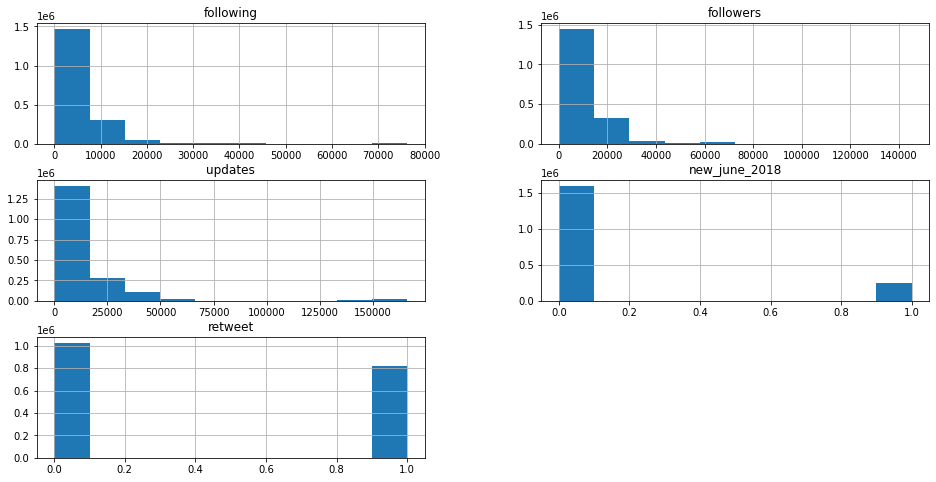

In [37]:
#original data
troll_data.hist(figsize=(16,8))


array([[<AxesSubplot:title={'center':'following'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'updates'}>,
        <AxesSubplot:title={'center':'new_june_2018'}>],
       [<AxesSubplot:title={'center':'retweet'}>, <AxesSubplot:>]],
      dtype=object)

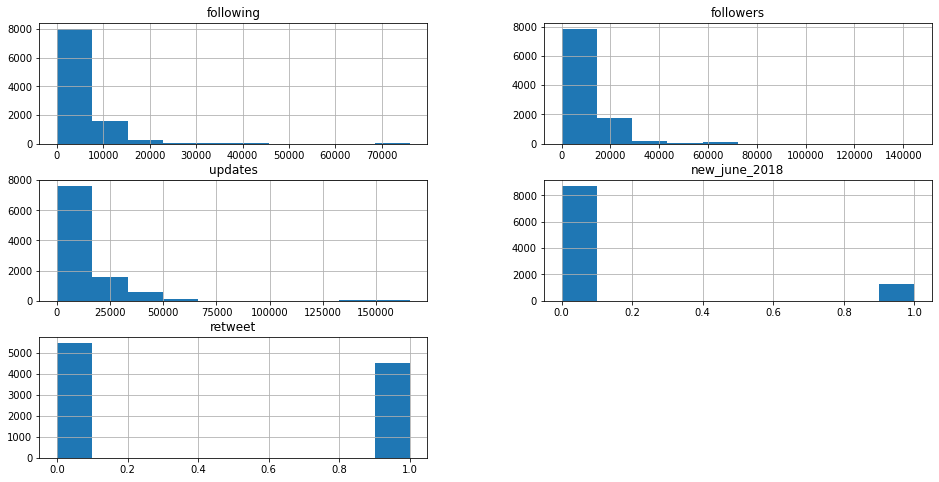

In [38]:
#sampled data (positive_data)

#Check distribution
positive_data.hist(figsize = (16,8))

In [39]:
#perfect , our positive data is equally distributed as original data
#let use postive data for further process

positive_data.head()

,content,region,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
148290,#MyDeathWillLikelyInvolve millions of chocolat...,United States,133,129,544,NOT_RETWEET,Hashtager,1,0,HashtagGamer
139232,U.S. regulators accused two Chinese citizens o...,United States,8723,12303,12063,NOT_RETWEET,News,1,0,NewsFeed
366494,'@porridgeisgood It starts like that and begin...,United States,2185,1765,459,NOT_RETWEET,Left,0,0,LeftTroll
348242,http://t.co/XrIg0QVMAY Obsessed with buying wo...,United States,5,324,12598,NOT_RETWEET,Commercial,1,0,Commercial
373285,They're training us to be cowards bruh everyth...,United States,5823,8382,10320,QUOTE_TWEET,Left,0,1,LeftTroll


In [40]:
#use only content column

positive_data = pd.DataFrame(positive_data.content)

In [41]:
positive_data

,content
148290,#MyDeathWillLikelyInvolve millions of chocolat...
139232,U.S. regulators accused two Chinese citizens o...
366494,'@porridgeisgood It starts like that and begin...
348242,http://t.co/XrIg0QVMAY Obsessed with buying wo...
373285,They're training us to be cowards bruh everyth...
...,...
197380,Man injured when shot at hotel #news
210346,Afghan forces recapture city center amid fierc...
242345,JUST IN: Sanders pledges to work with Clinton ...
12189,#My4WordNewYearsResolution make it to 2018....


In [42]:
print("postive data length :{} \t negative data length : {}".format(len(positive_data),len(negative_data)))

postive data length :10000 	 negative data length : 7578


In [122]:
#adding label

temp1 = np.ones(len(positive_data))

In [44]:
positive_data['label'] = temp1

In [45]:
positive_data['label'] = positive_data.label.astype(int)

In [46]:

temp2 = np.zeros(len(negative_data))

In [47]:
negative_data['label'] = temp2

In [48]:
negative_data['label'] = negative_data.label.astype(int)

In [49]:
positive_data.head()

,content,label
148290,#MyDeathWillLikelyInvolve millions of chocolat...,1
139232,U.S. regulators accused two Chinese citizens o...,1
366494,'@porridgeisgood It starts like that and begin...,1
348242,http://t.co/XrIg0QVMAY Obsessed with buying wo...,1
373285,They're training us to be cowards bruh everyth...,1


In [50]:
negative_data.head()

,content,label
0,Donald Trump vs. Hillary Clinton Debate Cold O...,0
1,"@realDonaldTrump The need is to blow off the ""...",0
2,US-Medien: Trump zahlte womöglich jahrelang ke...,0
3,#amjoy #cnn #msnbc #Trump has 2 words for #dep...,0
4,and you people who can't good old boy loans a...,0


In [51]:
data = pd.concat([positive_data,negative_data],axis=0)

In [52]:
data.head()

,content,label
148290,#MyDeathWillLikelyInvolve millions of chocolat...,1
139232,U.S. regulators accused two Chinese citizens o...,1
366494,'@porridgeisgood It starts like that and begin...,1
348242,http://t.co/XrIg0QVMAY Obsessed with buying wo...,1
373285,They're training us to be cowards bruh everyth...,1


In [53]:
data = data.sample(frac=1).reset_index(drop=True)

In [54]:
data.head()

,content,label
0,Yes 😦 Hillary is bloodline. 👑,0
1,NASA: National Anal Sex Association #Alternati...,1
2,#MomIn5Words Great life = Jesus Christ! https...,1
3,"As news of Trump’s taxes breaks, he goes off s...",0
4,New app can help Juárez women who are in dange...,1


Perfect!! Our dataset is now ready for further process

# Feature Engineering

In [55]:
#importing essential libraries useful for feature extraction
import re

# Natural Language Tool Kit 
import nltk
nltk.download('stopwords')

# to remove stopword 
from nltk.corpus import stopwords

# for Stemming propose 
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKHIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
len(data)

17578

In [57]:
# Initialize empty array 
# to append clean text 
corpus = []
ps = PorterStemmer()

# 17578 (contents) rows to clean
for i in range(0, len(data)):
    content = re.sub(r"http\S+", "", data['content'][i])
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    
    
    # split to list (delimiter " ") 
    content = content.split()
    
   
    
    # rejoin all string array elements to create back into a string 
    
    content = [ps.stem(word) for word in content if not word in set(stopwords.words('english'))]
    
    # append each string to create 
    # array of clean text 
    content = ' '.join(content)
    corpus.append(content)

In [58]:
#corpus

# Model Creation

# Bag of Word 

In [59]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =5000)
X = cv.fit_transform(corpus)
y = data.iloc[:, 1].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [61]:
X_train.shape

(14062, 5000)

## BoW with Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [163]:
bow_classifier_1 = MultinomialNB()
bow_classifier_1.fit(X_train, y_train)

MultinomialNB()

In [165]:
y_pred_1 = bow_classifier_1.predict(X_test)

In [166]:
cm_1 = confusion_matrix(y_test, y_pred_1)
print(cm_1)

[[1249  246]
 [ 180 1841]]


In [167]:
print("Accuracy = {}%".format((3090/3516)*100))

Accuracy = 87.8839590443686%


In [168]:
print(classification_report(y_pred=y_pred_1,y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1495
           1       0.88      0.91      0.90      2021

    accuracy                           0.88      3516
   macro avg       0.88      0.87      0.88      3516
weighted avg       0.88      0.88      0.88      3516



## BOW with Logistic Regression

Accuracy = 87%

In [67]:
from sklearn.linear_model import LogisticRegression

In [169]:
bowclassifier_2 = LogisticRegression()
bowclassifier_2.fit(X_train, y_train)

LogisticRegression()

In [170]:
y_pred_2 = bowclassifier_2.predict(X_test)

In [171]:
cm_2 = confusion_matrix(y_test, y_pred_2)
print(cm_2)

[[1274  221]
 [ 128 1893]]


In [172]:
print(classification_report(y_pred=y_pred_2,y_true=y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1495
           1       0.90      0.94      0.92      2021

    accuracy                           0.90      3516
   macro avg       0.90      0.89      0.90      3516
weighted avg       0.90      0.90      0.90      3516



In [173]:
print("Accuracy = {}%".format((3167/3516)*100))

Accuracy = 90.07394766780432%


## BOW with Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [174]:
bowclassifier_3 = RandomForestClassifier(n_estimators = 10)


In [175]:
bowclassifier_3.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [176]:
y_pred_3 = bowclassifier_3.predict(X_test)
cm_3 = confusion_matrix(y_test, y_pred_3)
print(cm_3)

[[1422   73]
 [ 428 1593]]


In [177]:
print(classification_report(y_pred=y_pred_3,y_true=y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1495
           1       0.96      0.79      0.86      2021

    accuracy                           0.86      3516
   macro avg       0.86      0.87      0.86      3516
weighted avg       0.88      0.86      0.86      3516



In [178]:
print("Accuracy = {}%".format((3010/3516)*100))

Accuracy = 85.60864618885097%


# Tf-Idf

## tf-Idf with Naive Baise

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tv =TfidfVectorizer()

In [79]:
X2 = tv.fit_transform(corpus)


In [80]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.20, random_state = 0)

In [83]:
X2_train.shape

(14062, 21783)

In [179]:
tfclassifier1 = MultinomialNB()
tfclassifier1.fit(X2_train, y2_train)

MultinomialNB()

In [180]:
y_tf_pred1= tfclassifier1.predict(X2_test)

In [181]:
cm_tf_1 = confusion_matrix(y_test, y_tf_pred1)
print(cm_tf_1)

[[1196  299]
 [ 177 1844]]


In [87]:
print(classification_report(y2_test,y_tf_pred1))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1495
           1       0.86      0.91      0.89      2021

    accuracy                           0.86      3516
   macro avg       0.87      0.86      0.86      3516
weighted avg       0.86      0.86      0.86      3516



In [182]:
print("Accuracy = {}%".format((3040/3516)*100))

Accuracy = 86.46188850967008%


# tf-idf with logistic regression

In [88]:
tfclassifier2 = LogisticRegression()

In [89]:
tfclassifier2.fit(X2_train,y2_train)

LogisticRegression()

In [90]:
y_tf_pred2 = tfclassifier2.predict(X2_test)

In [91]:
cm_tf_2 = confusion_matrix(y_test,y_tf_pred2)

In [92]:
print(cm_tf_2)

[[1259  236]
 [ 117 1904]]


In [93]:
print(classification_report(y_test,y_tf_pred2))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1495
           1       0.89      0.94      0.92      2021

    accuracy                           0.90      3516
   macro avg       0.90      0.89      0.90      3516
weighted avg       0.90      0.90      0.90      3516



In [141]:
print("Accuracy = {}%".format((3163/3516)*100))

Accuracy = 89.96018202502844%


## tf-idf with  RandomForest 

In [123]:
tfclassifier3 = RandomForestClassifier()
tfclassifier3.fit(X2_train,y2_train)
y_tf_pred3 = tfclassifier3.predict(X2_test)

In [124]:
print(confusion_matrix(y_test,y_tf_pred3))

[[1440   55]
 [ 369 1652]]


In [125]:
print(classification_report(y_test,y_tf_pred3))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1495
           1       0.97      0.82      0.89      2021

    accuracy                           0.88      3516
   macro avg       0.88      0.89      0.88      3516
weighted avg       0.89      0.88      0.88      3516



In [142]:
print("Accuracy = {}%".format((3092/3516)*100))

Accuracy = 87.94084186575654%


# N-gram tf-Idf

## n-gram tfidf with naive bayse

In [126]:
tvf = TfidfVectorizer(ngram_range=((2, 2)),max_features=5000)
X3 = tvf.fit_transform(corpus)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.20, random_state = 0)

In [127]:
ngclassifier1 = MultinomialNB()
ngclassifier1.fit(X3_train, y3_train)
y_ng_pred1 = ngclassifier1.predict(X3_test)


In [128]:
print(classification_report(y_test,y_ng_pred1))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1495
           1       0.79      0.96      0.87      2021

    accuracy                           0.83      3516
   macro avg       0.85      0.81      0.82      3516
weighted avg       0.84      0.83      0.82      3516



In [129]:
print(confusion_matrix(y_test,y_ng_pred1))

[[ 986  509]
 [  90 1931]]


In [130]:
print('accuracy : {}%'.format(((1000+1867)/3516)*100))

accuracy : 81.5415244596132%


## ngram tfidf with logistic regression

In [131]:
ngclassifier2 = LogisticRegression(C=10,)
ngclassifier2.fit(X3_train, y3_train)
y_ng_pred2 = ngclassifier2.predict(X3_test)


In [132]:
print(classification_report(y_test,y_ng_pred2))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1495
           1       0.82      0.94      0.88      2021

    accuracy                           0.85      3516
   macro avg       0.86      0.83      0.84      3516
weighted avg       0.85      0.85      0.84      3516



In [133]:
confusion_matrix(y_test,y_ng_pred2)

array([[1078,  417],
       [ 123, 1898]], dtype=int64)

In [143]:
print("Accuracy = {}%".format((2976/3516)*100))

Accuracy = 84.64163822525597%


## ngram tfidf with Random Forest

In [144]:
ngclassifier3 = RandomForestClassifier()
ngclassifier3.fit(X3_train, y3_train)
y_ng_pred3 = ngclassifier3.predict(X3_test)


In [145]:
print(classification_report(y_test,y_ng_pred2))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1495
           1       0.82      0.94      0.88      2021

    accuracy                           0.85      3516
   macro avg       0.86      0.83      0.84      3516
weighted avg       0.85      0.85      0.84      3516



In [146]:
print(confusion_matrix(y_test,y_ng_pred3))

[[1057  438]
 [ 109 1912]]


In [147]:
print("Accuracy = {}%".format((3090/3516)*100))

Accuracy = 87.8839590443686%


# Char Tf-Idf

In [149]:
ctf = TfidfVectorizer(ngram_range=((2, 3)),analyzer='char',max_features=5000)
X4 = tvf.fit_transform(corpus)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.20, random_state = 0)

## Char tfidf with Naive Bayes

In [150]:
ctfclassifier1 = MultinomialNB()
ctfclassifier1.fit(X4_train, y4_train)
y_ctf_pred1 = ctfclassifier1.predict(X4_test)

In [151]:
print(classification_report(y_test,y_ctf_pred1))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1495
           1       0.79      0.96      0.87      2021

    accuracy                           0.83      3516
   macro avg       0.85      0.81      0.82      3516
weighted avg       0.84      0.83      0.82      3516



In [152]:
print(confusion_matrix(y4_test,y_ctf_pred1))

[[ 986  509]
 [  90 1931]]


In [162]:
print("Accuracy = {}%".format((2917/3516)*100))

Accuracy = 82.96359499431172%


## char tfidf with logistic regression

In [153]:
ctfclassifier2 = LogisticRegression(C=25)
ctfclassifier2.fit(X4_train, y4_train)
y_ctf_pred2 = ctfclassifier2.predict(X4_test)

C:\Users\NIKHIL\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [154]:
print(classification_report(y_test,y_ctf_pred2))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1495
           1       0.82      0.93      0.87      2021

    accuracy                           0.84      3516
   macro avg       0.85      0.83      0.83      3516
weighted avg       0.85      0.84      0.84      3516



In [155]:
print(confusion_matrix(y4_test,y_ctf_pred2))

[[1079  416]
 [ 134 1887]]


In [160]:
print("Accuracy = {}%".format((2966/3516)*100))

Accuracy = 84.35722411831627%


## chartfidf with Random Forest

In [157]:
ctfclassifier3 = RandomForestClassifier()
ctfclassifier3.fit(X4_train, y4_train)
y_ctf_pred3 = ctfclassifier3.predict(X4_test)

In [158]:
print(classification_report(y_test,y_ctf_pred3))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1495
           1       0.82      0.95      0.88      2021

    accuracy                           0.85      3516
   macro avg       0.86      0.83      0.84      3516
weighted avg       0.85      0.85      0.84      3516



In [159]:
print(confusion_matrix(y4_test,y_ctf_pred3))

[[1062  433]
 [ 109 1912]]


In [161]:
print("Accuracy = {}%".format((2974/3516)*100))

Accuracy = 84.58475540386803%
